*Clustering Analysis*

An Italian wine consortium representing vineyards in a specific region has commissioned a study to improve its understanding of
the chemical properties of its wines. The region produces three distinct wine varieties (cultivars), and the consortium wants to
ensure that each cultivar maintains its unique quality and consistency while exploring new ways to market its products effectively.

You are hired as a data analyst to help the consortium achieve these goals. Your task is to use K-Means clustering to group the
wines based on their chemical properties and identify natural clusters.

The dataset is named "wine_clustering.csv" and can be downloaded from the “Project Datasets” folder on myLMS

Implement K-means clustering on the data in the scenario above. Ensure that you standardise your data. You may use either the
elbow or silhouette method to determine the optimal number of clusters. After implementing the clustering, create a plot to
visualise the clusters you have created.
(10 marks)

silhouette scores: {2: 0.259, 3: 0.285, 4: 0.26, 5: 0.202, 6: 0.237}
chosen k (best silhouette) = 3


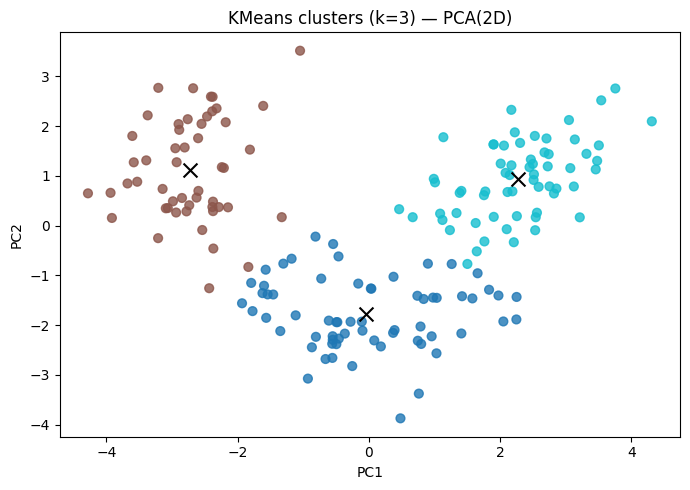

In [1]:
# ...existing code...
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# load data
df = pd.read_csv("wine_clustering.csv")
X = df.values

# standardise
scaler = StandardScaler()
Xs = scaler.fit_transform(X)

# choose k by silhouette (2..6)
ks = range(2, 7)
sil_scores = []
inertias = []
for k in ks:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(Xs)
    sil_scores.append(silhouette_score(Xs, labels))
    inertias.append(km.inertia_)

best_k = ks[int(np.argmax(sil_scores))]
print("silhouette scores:", dict(zip(ks, [round(s,3) for s in sil_scores])))
print("chosen k (best silhouette) =", best_k)

# fit final KMeans
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10).fit(Xs)
labels = kmeans.labels_

# 2D PCA for visualisation
pca = PCA(n_components=2, random_state=42)
X2 = pca.fit_transform(Xs)
centers2 = pca.transform(kmeans.cluster_centers_)

plt.figure(figsize=(7,5))
scatter = plt.scatter(X2[:,0], X2[:,1], c=labels, cmap="tab10", s=40, alpha=0.8)
plt.scatter(centers2[:,0], centers2[:,1], c="black", s=100, marker="x")
plt.title(f"KMeans clusters (k={best_k}) — PCA(2D)")
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.grid(False)
plt.tight_layout()
plt.show()

# save labels (optional)
df_out = df.copy()
df_out["cluster"] = labels
df_out.to_csv("wine_clusters.csv", index=False)
# ...existing code...